In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

#### A Little Statistics.

### Q1
<b>B.</b>

In [17]:
cdf_0=stats.norm.cdf(0)                   #Outputs cdf at input point- 0
cdf_04=stats.norm.cdf(0.4)
cdf_046=stats.norm.cdf(0.46)
cdf_n046=stats.norm.cdf(-0.46)
print (" For a Gaussian centered at 0 following are the cdf values: \n")
print ("  0: ",cdf_0,"\n"," 0.4:",cdf_04)
print ("  0.46:",cdf_046,"\n","-0.46:",cdf_n046)

print ("\nThese values resemble values in the Z table. ")

 For a Gaussian centered at 0 following are the cdf values: 

  0:  0.5 
  0.4: 0.6554217416103242
  0.46: 0.6772418897496523 
 -0.46: 0.32275811025034773

These values resemble values in the Z table. 


<b> C & D </b>

In [32]:
ppf_0=stats.norm.ppf(0)                ##Outputs sigma corresponding to a given cdf
ppf_1=stats.norm.ppf(0.5)
ppf_n1=stats.norm.ppf(-1)
ppf_5=stats.norm.ppf(1)
ppf_2=stats.norm.ppf(2)

print (" For a Gaussian centered at 0 following are the ppf outputs: \n")
print ("  0:",ppf_0,"\n  0.5:",ppf_1)
print ("  2:",ppf_2)
print (" -1:",ppf_n1,"\n  1:",ppf_5)

print ("\nThese values make sense.\n (1) The area is 0 precisely at negative infinity.\n (2) For a Gaussian centered at 0, probabiliy is 1/2 at 0 sigma.\n (3) cdf can't be negative thus ppf(x<0) DNE.\n (4) Max(cdf)=1 thus, we get ppf = infinity for all x=1.\n (5) Max(cdf)=1 thus, cdf>1 DNE.  ")



 For a Gaussian centered at 0 following are the ppf outputs: 

  0: -inf 
  0.5: 0.0
  2: nan
 -1: nan 
  1: inf

These values make sense.
 (1) The area is 0 precisely at negative infinity.
 (2) For a Gaussian centered at 0, probabiliy is 1/2 at 0 sigma.
 (3) cdf can't be negative thus ppf(x<0) DNE.
 (4) Max(cdf)=1 thus, we get ppf = infinity for all x=1.
 (5) Max(cdf)=1 thus, cdf>1 DNE.  


## Q2

### A. Lognormal Distribution
When logarithm of a distribution is normally distributed. For eg, if X is normally distributed, e^x is lognormally distributed. 
PDF is given by :
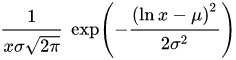

### B : Creating Plots

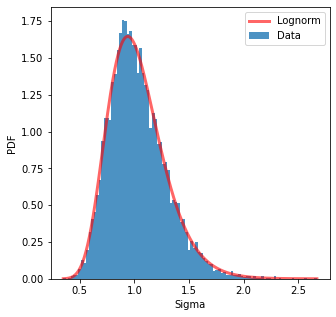

In [42]:
mu,sigma=0,0.25
ln=np.random.lognormal(mean=0,sigma=0.25,size=10000)
bin_heights,bins,patches=plt.hist(ln,bins=100,density=True,label="Data",alpha=0.8)
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=3, color='r',alpha=0.6,label="Lognorm")
plt.axis('tight')
plt.xlabel("Sigma")
plt.ylabel("PDF")
plt.legend()
plt.show()

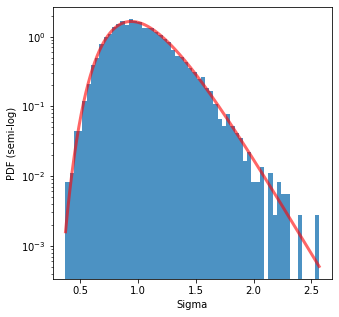

In [41]:
# Checking log of distribution (should be normal)
bin_heights,bins,patches=plt.hist(ln,bins=60,density=True,alpha=0.8)
plt.plot(x, pdf, linewidth=3, color='r',alpha=0.6,label="Lognorm")
plt.xlabel("Sigma")
plt.ylabel("PDF (semi-log)")
plt.yscale("log")

### Q3.

<b> A </b>  Hypothetical value = 1.5

<b> B. </b>  Statistical Question:  If the signal-free data (noise) follows a lognormal distribution, what is the probability that the noise gives a signal that is equally or more signal like than the observation?

<b> C. </b> 
$$ P = \int_{X\sigma}^\infty \! {f}(x) \, \mathrm{d}x \\ \\ \\ $$

Where f(x) represents the lognormal pdf.

<b> D. </b>

In [60]:
val=1.5       #Hypothetical Value
cdf=scipy.stats.lognorm.cdf(val,s=0.25,loc=0,scale=1)  #Probability that noise gives a value less than the hypothetical value.
P=1-cdf
print (P,"is the probability that the value obtained was due to the background.")

0.0524166176428017 is the probability that the value obtained was due to the background.


<b> E. </b>

In [61]:
sigma_equivalent = stats.norm.ppf(P)          #Map that probability to a gaussian to obtain sigma. 
print (sigma_equivalent,"is the sigma equivalent of the probability.")

-1.621860432432657 is the sigma equivalent of the probability.


### Q4.

In [66]:
val=1.2       #Hypothetical Value
cdf=scipy.stats.lognorm.cdf(val,s=0.25,loc=0,scale=1)
P=1-cdf
print (P,"is the probability that the value obtained was due to the background @",val)
sigma_equivalent = stats.norm.ppf(P)
print (sigma_equivalent,"is the sigma equivalent of the probability @",val)

0.232913297665446 is the probability that the value obtained was due to the background @ 1.2
-0.7292862271758184 is the sigma equivalent of the probability @ 1.2


In [67]:
val=1      #Hypothetical Value
cdf=scipy.stats.lognorm.cdf(val,s=0.25,loc=0,scale=1)
P=1-cdf
print (P,"is the probability that the value obtained was due to the background @",val)
sigma_equivalent = stats.norm.ppf(P)
print (sigma_equivalent,"is the sigma equivalent of the probability @",val)

0.5 is the probability that the value obtained was due to the background @ 1
0.0 is the sigma equivalent of the probability @ 1


In [68]:
val=0.6      #Hypothetical Value
cdf=scipy.stats.lognorm.cdf(val,s=0.25,loc=0,scale=1)
P=1-cdf
print (P,"is the probability that the value obtained was due to the background @",val)
sigma_equivalent = stats.norm.ppf(P)
print (sigma_equivalent,"is the sigma equivalent of the probability @",val)

0.979488748616238 is the probability that the value obtained was due to the background @ 0.6
2.0433024950639624 is the sigma equivalent of the probability @ 0.6


In [69]:
val=0.3      #Hypothetical Value
cdf=scipy.stats.lognorm.cdf(val,s=0.25,loc=0,scale=1)
P=1-cdf
print (P,"is the probability that the value obtained was due to the background @",val)
sigma_equivalent = stats.norm.ppf(P)
print (sigma_equivalent,"is the sigma equivalent of the probability @",val)

0.9999992672782675 is the probability that the value obtained was due to the background @ 0.3
4.815891217298762 is the sigma equivalent of the probability @ 0.3



As the hypothetical values approach the peak from the right, the probability increases. This is because the area under curve increases. 
Likewise, as the hypothetical values approach the peak from the left, the probability decreases since the area to be integrated decreases. 


#### Non-continuous distributions

#### Q1
<b> A. </b>
<u> Binomial Distribution </u>: Used to prepresent the probability of the number of successes (or number of failures) in an experiment. It is characterized by two parameters, n ( number of trials) and p ( probability of success). 
Its pmf is given by: 
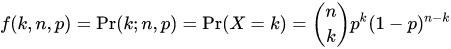, 
$$ \\ $$
where
$$ \\ $$
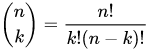!

#### Q2

<b> B. </b>

Text(5, 0.1, 'n: 5\np: 0.5')

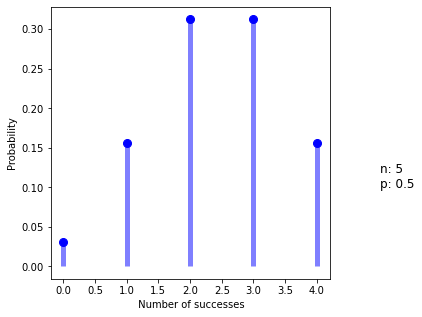

In [50]:
from scipy.stats import binom
n, p = 5, 0.5
fig,ax=plt.subplots()
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel(" Number of successes")
ax.set_ylabel("Probability")
plt.text(5,0.1,f'n: {n}\np: {p}',size="large")

Text(15, 0.1, 'n: 15\np: 0.5')

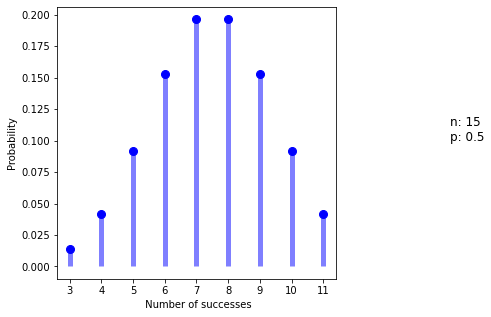

In [33]:
n, p = 15, 0.5
fig,ax=plt.subplots()
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel(" Number of successes")
ax.set_ylabel("Probability")
plt.text(15,0.1,f'n: {n}\np: {p}',size="large")

Text(10, 0.1, 'n: 50\np: 0.1')

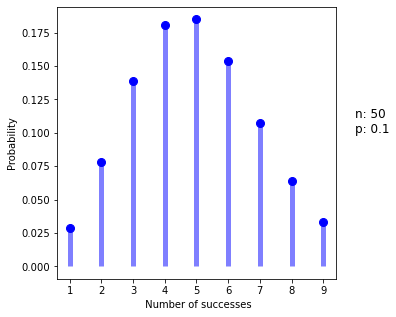

In [53]:
from scipy.stats import binom
n, p = 50, 0.1
fig,ax=plt.subplots()
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel(" Number of successes")
ax.set_ylabel("Probability")
plt.text(10,0.1,f'n: {n}\np: {p}',size="large")

Text(30, 0.1, 'n: 50\np: 0.4')

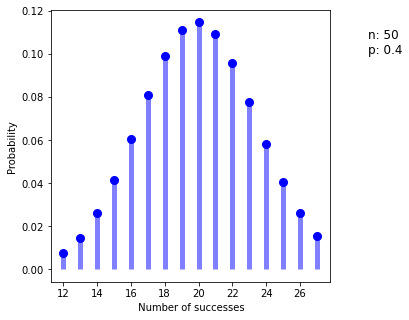

In [54]:
from scipy.stats import binom
n, p = 50, 0.4
fig,ax=plt.subplots()
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel(" Number of successes")
ax.set_ylabel("Probability")
plt.text(30,0.1,f'n: {n}\np: {p}',size="large")

Text(90, 0.1, 'n: 100\np: 0.8')

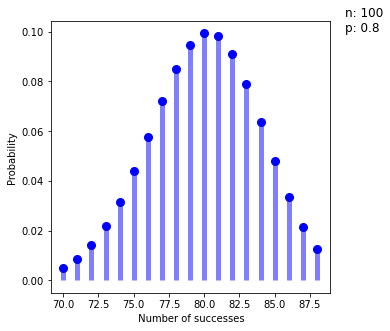

In [49]:
from scipy.stats import binom
n, p = 100, 0.8
fig,ax=plt.subplots()
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel(" Number of successes")
ax.set_ylabel("Probability")
plt.text(90,0.1,f'n: {n}\np: {p}',size="large")

As the probability of success increases, so does the number of successes. In other words. the distribution shifts to the right.

<b> C. </b>
<u> Hypothetical Question </u> : What is the probability of the number of success when number of trials is 100 and the probability of success is 0.8? What is its associated sigma?

<b> D. </b>